# Differential Expression Analysis in GenePattern Notebook

Find genes that are significantly differentially expressed between classes of samples.

## Before you begin

* Sign in to GenePattern by entering your username and password into the form below. 
* Gene expression data must be in a [GCT or RES file](https://genepattern.broadinstitute.org/gp/pages/protocols/GctResFiles.html).
    * Example file: [all_aml_test.gct](https://datasets.genepattern.org/data/all_aml/all_aml_test.gct).
* The class of each sample must be identified in a [CLS file](https://genepattern.broadinstitute.org/gp/pages/protocols/ClsFiles.html).
    * Example file: [all_aml_test.cls](https://datasets.genepattern.org/data/all_aml/all_aml_test.cls).
* Learn more by reading about [file formats](http://www.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT).


In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Step 0: Import data from GEO

In [8]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

In [9]:
geoimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')
geoimporter_job_spec = geoimporter_task.make_job_spec()
geoimporter_job_spec.set_parameter("GEO.accession", "GSE10325")
geoimporter_job_spec.set_parameter("GEO.SOFT.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run5585897434122589070.tmp/GSE10325_family%20%281%29.soft.gz")
geoimporter_job_spec.set_parameter("Drop.NA.Rows", "TRUE")
geoimporter_job_spec.set_parameter("data.column.name", "VALUE")
geoimporter_job_spec.set_parameter("output.filename", "<GEO.accession><GEO.SOFT.file_basename>")
geoimporter_job_spec.set_parameter("ftp.proxy.server", "")
geoimporter_job_spec.set_parameter("ftp.proxy.username", "")
geoimporter_job_spec.set_parameter("ftp.proxy.password", "")
geoimporter_job_spec.set_parameter("http.proxy.server", "")
geoimporter_job_spec.set_parameter("http.proxy.username", "")
geoimporter_job_spec.set_parameter("http.proxy.password", "")
geoimporter_job_spec.set_parameter("job.memory", "2Gb")
geoimporter_job_spec.set_parameter("job.walltime", "02:00:00")
geoimporter_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(geoimporter_task)

job479074 = gp.GPJob(genepattern.session.get(0), 479074)
genepattern.display(job479074)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')

GPJobWidget(job_number=479074)

## Step 1: PreprocessDataset

Preprocess gene expression data to remove platform noise and genes that have little variation. You can test this step by starting a job using parameters entered into the form below.

### Considerations

* PreprocessDataset can preprocess the data in one or more ways (in this order):
    1. Set threshold and ceiling values. Any value lower/higher than the threshold/ceiling value is reset to the threshold/ceiling value.
    2. Convert each expression value to the log base 2 of the value.
    3. Remove genes (rows) if a given number of its sample values are less than a given threshold.
    4. Remove genes (rows) that do not have a minimum fold change or expression variation.
    5. Discretize or normalize the data.
* ComparativeMarkerSelection expects non-log-transformed data. Some calculations, such as Fold Change, will produce incorrect results on log transformed data.
* If you did not generate the expression data, check whether preprocessing steps have already been taken before running the PreprocessDataset module.
* Learn more by reading about the [PreprocessDataset](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=PreprocessDataset) module.

<div class="alert alert-info">
<h3 style="position: relative; top: -10px">Instructions</h3>
Click the *Run* button on the analysis below.</div>

In [10]:
preprocessdataset_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')
preprocessdataset_job_spec = preprocessdataset_task.make_job_spec()
preprocessdataset_job_spec.set_parameter("input.filename", "https://cloud.genepattern.org/gp/jobResults/479074/GSE10325GSE10325_family%20%281%29.soft.gct")
preprocessdataset_job_spec.set_parameter("threshold.and.filter", "0")
preprocessdataset_job_spec.set_parameter("floor", "20")
preprocessdataset_job_spec.set_parameter("ceiling", "20000")
preprocessdataset_job_spec.set_parameter("min.fold.change", "3")
preprocessdataset_job_spec.set_parameter("min.delta", "100")
preprocessdataset_job_spec.set_parameter("num.outliers.to.exclude", "0")
preprocessdataset_job_spec.set_parameter("row.normalization", "0")
preprocessdataset_job_spec.set_parameter("row.sampling.rate", "1")
preprocessdataset_job_spec.set_parameter("threshold.for.removing.rows", "")
preprocessdataset_job_spec.set_parameter("number.of.columns.above.threshold", "")
preprocessdataset_job_spec.set_parameter("log2.transform", "0")
preprocessdataset_job_spec.set_parameter("output.file.format", "3")
preprocessdataset_job_spec.set_parameter("output.file", "<input.filename_basename>.log2.preprocessed")
genepattern.display(preprocessdataset_task)

job479081 = gp.GPJob(genepattern.session.get(0), 479081)
genepattern.display(job479081)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')

GPJobWidget(job_number=479075)

## Step 1.5: Create CLS File for phenote type

In [11]:
clsfilecreator_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')
clsfilecreator_job_spec = clsfilecreator_task.make_job_spec()
clsfilecreator_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/479074/GSE10325GSE10325_family%20%281%29.soft.gct")
clsfilecreator_job_spec.set_parameter("job.memory", "2Gb")
clsfilecreator_job_spec.set_parameter("job.walltime", "02:00:00")
clsfilecreator_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(clsfilecreator_task)

job478677 = gp.GPJob(genepattern.session.get(0), 478677)
genepattern.display(job478677)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')

GPJobWidget(job_number=478677)

## Step 2: ComparativeMarkerSelection

ComparativeMarkerSelection computes differential gene expression. For each gene, it uses a test statistic to calculate the difference in gene expression between classes and then computes a p-value to estimate the significance of the test statistic score.

Because testing tens of thousands of genes simultaneously increases the possibility of mistakenly identifying a non-marker gene as a marker gene (a false positive), ComparativeMarkerSelection corrects for multiple hypothesis testing by computing both false discovery rates (FDR) and family-wise error rates (FWER). 

### Considerations

* If the data set includes at least 10 samples per class, use the default value of 1000 permutations to ensure accurate p-values. If the data set includes fewer than 10 samples in any class, permuting the samples cannot give an accurate p-value; specify 0 permutations to use asymptotic p-values instead.
* If the data set includes more than two classes, use the phenotype test parameter to analyze each class against all others (one-versus-all) or all class pairs (all pairs).
* Learn more by reading about the [ComparativeMarkerSelection](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelection) module.


<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the PreprocessDataset job above finishes running, send the GCT result of that job to ComparativeMarkerSelection below. To do this either drag-and-drop the link for the file above to the *input.file* input below, or click the link for the file above and select *Send to an Existing GenePattern Cell > ComparativeMarkerSelection* in the menu that appears.</p>

<p>For your convenience, the necessary CLS file for ComparativeMarkerSelection is already supplied for the analysis below. Once this is done, click *Run* for the analysis below.</p>
</div>

In [12]:
comparativemarkerselection_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')
comparativemarkerselection_job_spec = comparativemarkerselection_task.make_job_spec()
comparativemarkerselection_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/479081/GSE10325GSE10325_family%20%281%29.soft.log2.preprocessed.gct")
comparativemarkerselection_job_spec.set_parameter("cls.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run6035814643691556608.tmp/GSE10325GSE10325_family.soft.preprocessed.cls")
comparativemarkerselection_job_spec.set_parameter("confounding.variable.cls.file", "")
comparativemarkerselection_job_spec.set_parameter("test.direction", "2")
comparativemarkerselection_job_spec.set_parameter("test.statistic", "0")
comparativemarkerselection_job_spec.set_parameter("min.std", "")
comparativemarkerselection_job_spec.set_parameter("number.of.permutations", "10000")
comparativemarkerselection_job_spec.set_parameter("log.transformed.data", "false")
comparativemarkerselection_job_spec.set_parameter("complete", "false")
comparativemarkerselection_job_spec.set_parameter("balanced", "false")
comparativemarkerselection_job_spec.set_parameter("random.seed", "779948241")
comparativemarkerselection_job_spec.set_parameter("smooth.p.values", "true")
comparativemarkerselection_job_spec.set_parameter("phenotype.test", "one versus all")
comparativemarkerselection_job_spec.set_parameter("output.filename", "<input.file_basename>.comp.marker.odf")
genepattern.display(comparativemarkerselection_task)

job479082 = gp.GPJob(genepattern.session.get(0), 479082)
genepattern.display(job479082)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')

GPJobWidget(job_number=479076)

## Step 3: ComparativeMarkerSelectionViewer

Run the ComparativeMarkerSelectionViewer module to view the results. The viewer displays the test statistic score, its p value, two FDR statistics and three FWER statistics for each gene. 

### Considerations

* Generally, researchers identify marker genes based on FDR rather than the more conservative FWER.
* Often, marker genes are identified based on an FDR cutoff value of .05, which indicates that a gene identified as a marker gene has a 1 in 20 (5%) chance of being a false positive. Select Edit>Filter Features>Custom Filter to filter results based on that criteria (or any other).
* Learn more by reading about the [ComparativeMarkerSelectionViewer](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelectionViewer) module.

<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the ComparativeMarkerSelection job above finishes, send the ODF result of that job to ComparativeMarkerSelectionViewer below. This can be achieved in a method similar to the one described in the last step.</p>
<p>Once this is accomplished, go back up to the PreprocessDataset job and also send its GCT output to ComparativeMarkerSelectionViewer.</p>

<p>Once both files are sent, click *Run* for the analysis below. Once the job downloads the necessary data it should display a visualization of the differential expression results.</p>
</div>

In [13]:
comparativemarkerselectionviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')
comparativemarkerselectionviewer_job_spec = comparativemarkerselectionviewer_task.make_job_spec()
comparativemarkerselectionviewer_job_spec.set_parameter("comparative.marker.selection.filename", "")
comparativemarkerselectionviewer_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479081/GSE10325GSE10325_family%20%281%29.soft.log2.preprocessed.gct")
genepattern.display(comparativemarkerselectionviewer_task)

job479083 = gp.GPJob(genepattern.session.get(0), 479083)
genepattern.display(job479083)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')

GPJobWidget(job_number=479078)

In [15]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import ODF
gse10325gse10325_family_1_soft_log2_preprocessed_comp_marker_odf_479082 = ODF(job479082.get_file("GSE10325GSE10325_family (1).soft.log2.preprocessed.comp.marker.odf"))
gse10325gse10325_family_1_soft_log2_preprocessed_comp_marker_odf_479082

/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:208: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dataframe = df
/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:304: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers


,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
0,23,204932_at,BF433902,4.342355,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.2282,0.2284,1.848432,15.157143,6.238021,8.200000,6.775653,0
1,34,221476_s_at,AF279903,4.131068,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.3692,0.3696,1.314787,6077.064286,1394.863773,4622.089744,1458.706819,0
2,46,213776_at,AA583336,3.973196,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.5055,0.5059,1.918006,142.935714,83.272085,74.523077,43.637595,0
3,54,210036_s_at,AB044806,3.896926,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.5809,0.5815,1.412520,168.814286,51.190832,119.512821,50.914144,0
4,55,213417_at,AW173045,3.868176,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.6081,0.6091,2.079385,34.128571,23.255025,16.412821,8.048739,0
5,75,216390_at,X06537,3.764004,0.000600,0.000121,0.000943,0.117255,0.117498,1.0,0.7052,0.7059,1.696213,24.442857,11.695850,14.410256,9.302597,2
6,81,205051_s_at,NM_000222,3.712440,0.000400,0.000030,0.000640,0.095822,0.089341,1.0,0.7505,0.7512,1.863616,45.242857,26.019941,24.276923,17.345065,1
7,86,203886_s_at,NM_001998,3.659968,0.000600,0.000121,0.000943,0.117255,0.117498,1.0,0.7996,0.8004,2.268177,29.207143,22.845130,12.876923,7.034444,2
8,94,214273_x_at,AV704353,3.578909,0.000800,0.000235,0.001226,0.139241,0.130656,1.0,0.8615,0.8624,1.325103,262.282143,70.882898,197.933333,74.897914,3
9,110,212085_at,AA916851,3.506570,0.001600,0.000786,0.002271,0.185655,0.176770,1.0,0.9078,0.9083,1.257541,5012.457143,1028.454211,3985.920513,1367.140656,7


In [16]:
id_refs = {
    'ELF1': ['212420','212418'],
    'IRF1': ['202531','238725'],
    'SYNGR1': ['204287','210613','213854'],
    'UNC5A': ['236448','243833'],
    'MT1F': ['213629','217165'],
}

def get_target_gene_ranking(gene_list,df):
    finding_result = pd.DataFrame(columns=df.columns)
    for gene_name, gene_id in gene_list.items():
        target_gene = df[(df['Feature'].str.contains(gene_id[0]))|(df['Feature'].str.contains(gene_id[1]))]
        finding_result = finding_result.append(target_gene)
#         finding_result['Gene_Name'] = gene_name
    return finding_result

In [17]:
# filter gene by FDR and get new ranking
df1 = gse10325gse10325_family_1_soft_log2_preprocessed_comp_marker_odf_479082
df1_new = df1[(df1['FDR(BH)'] <= 1.0)]
df1_new.insert(loc=1, column="Rank_2", value=list(df1_new['Score'].abs().rank(ascending=False)))
df1_new.loc[:,'Rank_2'] = df1_new['Rank_2'].astype(int)
df1_new

,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
0,23,23,204932_at,BF433902,4.342355,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.2282,0.2284,1.848432,15.157143,6.238021,8.200000,6.775653,0
1,34,34,221476_s_at,AF279903,4.131068,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.3692,0.3696,1.314787,6077.064286,1394.863773,4622.089744,1458.706819,0
2,46,46,213776_at,AA583336,3.973196,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.5055,0.5059,1.918006,142.935714,83.272085,74.523077,43.637595,0
3,54,54,210036_s_at,AB044806,3.896926,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.5809,0.5815,1.412520,168.814286,51.190832,119.512821,50.914144,0
4,55,55,213417_at,AW173045,3.868176,0.000200,0.000000,0.000299,0.063653,0.089341,1.0,0.6081,0.6091,2.079385,34.128571,23.255025,16.412821,8.048739,0
5,75,75,216390_at,X06537,3.764004,0.000600,0.000121,0.000943,0.117255,0.117498,1.0,0.7052,0.7059,1.696213,24.442857,11.695850,14.410256,9.302597,2
6,81,81,205051_s_at,NM_000222,3.712440,0.000400,0.000030,0.000640,0.095822,0.089341,1.0,0.7505,0.7512,1.863616,45.242857,26.019941,24.276923,17.345065,1
7,86,86,203886_s_at,NM_001998,3.659968,0.000600,0.000121,0.000943,0.117255,0.117498,1.0,0.7996,0.8004,2.268177,29.207143,22.845130,12.876923,7.034444,2
8,94,94,214273_x_at,AV704353,3.578909,0.000800,0.000235,0.001226,0.139241,0.130656,1.0,0.8615,0.8624,1.325103,262.282143,70.882898,197.933333,74.897914,3
9,110,110,212085_at,AA916851,3.506570,0.001600,0.000786,0.002271,0.185655,0.176770,1.0,0.9078,0.9083,1.257541,5012.457143,1028.454211,3985.920513,1367.140656,7


In [20]:
get_target_gene_ranking(id_refs,df1)

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
18727,7413,212420_at,AL559590,-1.113355,0.281944,0.273040,0.290672,0.831104,0.770892,1.0,1.0000,1.0000,1.162901,269.375000,153.948637,313.256410,166.051631,8591
20660,2893,212418_at,M82882,-1.768503,0.091982,0.086245,0.097563,0.643121,0.596773,1.0,1.0000,1.0000,1.221817,615.957143,268.365683,752.587179,363.958871,9541
21613,921,202531_at,NM_002198,-2.440150,0.020596,0.017750,0.023295,0.434703,0.403690,1.0,1.0000,1.0000,1.506617,1041.232143,462.823298,1568.738462,1234.594595,9898
5231,9870,204287_at,NM_004711,0.882022,0.363927,0.354407,0.373263,0.872570,0.809336,1.0,1.0000,1.0000,1.146875,107.385714,63.343319,93.633333,62.389892,1819
7011,13017,210613_s_at,BC000731,0.621002,0.534893,0.525017,0.544566,0.931756,0.864166,1.0,1.0000,1.0000,1.217040,70.532143,82.786405,57.953846,80.336931,2674
21753,672,213629_x_at,BF246115,-2.603052,0.012198,0.009988,0.014262,0.361915,0.336294,1.0,1.0000,1.0000,1.382384,353.903571,145.617316,489.230769,275.449131,9940
22172,122,217165_x_at,M10943,-3.463031,0.001200,0.000498,0.001760,0.171373,0.166950,1.0,0.9306,0.9308,1.898482,229.917857,133.081827,436.494872,337.798570,9995


In [21]:
get_target_gene_ranking(id_refs,df1_new)

,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
18727,7413,7413,212420_at,AL559590,-1.113355,0.281944,0.273040,0.290672,0.831104,0.770892,1.0,1.0000,1.0000,1.162901,269.375000,153.948637,313.256410,166.051631,8591
20660,2893,2893,212418_at,M82882,-1.768503,0.091982,0.086245,0.097563,0.643121,0.596773,1.0,1.0000,1.0000,1.221817,615.957143,268.365683,752.587179,363.958871,9541
21613,921,921,202531_at,NM_002198,-2.440150,0.020596,0.017750,0.023295,0.434703,0.403690,1.0,1.0000,1.0000,1.506617,1041.232143,462.823298,1568.738462,1234.594595,9898
5231,9870,9870,204287_at,NM_004711,0.882022,0.363927,0.354407,0.373263,0.872570,0.809336,1.0,1.0000,1.0000,1.146875,107.385714,63.343319,93.633333,62.389892,1819
7011,13017,13017,210613_s_at,BC000731,0.621002,0.534893,0.525017,0.544566,0.931756,0.864166,1.0,1.0000,1.0000,1.217040,70.532143,82.786405,57.953846,80.336931,2674
21753,672,672,213629_x_at,BF246115,-2.603052,0.012198,0.009988,0.014262,0.361915,0.336294,1.0,1.0000,1.0000,1.382384,353.903571,145.617316,489.230769,275.449131,9940
22172,122,122,217165_x_at,M10943,-3.463031,0.001200,0.000498,0.001760,0.171373,0.166950,1.0,0.9306,0.9308,1.898482,229.917857,133.081827,436.494872,337.798570,9995


## Extract Gene Expression Value for plotting

In [14]:
extractcomparativemarkerresults_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')
extractcomparativemarkerresults_job_spec = extractcomparativemarkerresults_task.make_job_spec()
extractcomparativemarkerresults_job_spec.set_parameter("comparative.marker.selection.filename", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run1723623044592593059.tmp/GSE10325GSE10325_family%20%281%29.soft.non-log2.preprocessed.comp.marker.odf")
extractcomparativemarkerresults_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479081/GSE10325GSE10325_family%20%281%29.soft.log2.preprocessed.gct")
extractcomparativemarkerresults_job_spec.set_parameter("statistic", "FDR(BH)")
extractcomparativemarkerresults_job_spec.set_parameter("min", "0")
extractcomparativemarkerresults_job_spec.set_parameter("max", "1.0")
extractcomparativemarkerresults_job_spec.set_parameter("number.of.neighbors", "")
extractcomparativemarkerresults_job_spec.set_parameter("base.output.name", "<comparative.marker.selection.filename_basename>.filt")
extractcomparativemarkerresults_job_spec.set_parameter("job.memory", "2Gb")
extractcomparativemarkerresults_job_spec.set_parameter("job.walltime", "02:00:00")
extractcomparativemarkerresults_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(extractcomparativemarkerresults_task)

job479084 = gp.GPJob(genepattern.session.get(0), 479084)
genepattern.display(job479084)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')

GPJobWidget(job_number=479079)

In [23]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import GCT
gse10325gse10325_family_1_soft_non_log2_preprocessed_comp_marker_filt_gct_479084 = GCT(job479084.get_file("GSE10325GSE10325_family (1).soft.non-log2.preprocessed.comp.marker.filt.gct"))
gse10325gse10325_family_1_soft_non_log2_preprocessed_comp_marker_filt_gct_479084

,,GSM260886,GSM260887,GSM260888,GSM260889,GSM260890,GSM260891,GSM260892,GSM260893,GSM260894,GSM260895,...,GSM260943,GSM260944,GSM260945,GSM260946,GSM260947,GSM260948,GSM260949,GSM260950,GSM260951,GSM260952
Name,Description,,,,,,,,,,,,,,,,,,,,,
204932_at,BF433902,18.6,10.8,23.3,10.5,16.6,23.2,16.6,18.6,10.4,8.4,...,4.7,4.2,2.9,10.9,0.9,14.3,2.3,6.6,2.8,4.4
221476_s_at,AF279903,6334.4,6600.9,6096.3,5686.4,6346.0,8006.9,9322.5,5177.4,7053.5,8025.6,...,2850.1,4545.8,5010.2,4041.7,2853.3,3298.3,3909.9,4560.4,3352.4,2918.2
213776_at,AA583336,116.0,153.9,22.9,87.0,133.6,66.4,84.5,16.0,116.0,126.2,...,8.9,40.6,79.8,54.8,21.0,62.7,42.9,49.8,68.4,12.9
210036_s_at,AB044806,206.5,193.8,182.1,191.8,128.0,158.7,198.4,112.6,183.9,220.7,...,127.0,151.2,89.3,79.0,56.3,126.1,122.5,153.4,58.4,75.0
213417_at,AW173045,12.3,54.1,16.5,13.0,41.2,48.7,24.4,21.9,14.0,46.9,...,14.6,20.8,7.8,9.7,10.1,11.7,12.9,24.0,9.0,13.1
216390_at,X06537,26.8,14.5,23.5,23.1,19.6,33.2,22.7,13.5,13.8,16.8,...,15.8,7.3,5.0,36.0,16.8,16.3,45.1,7.2,12.7,7.7
205051_s_at,NM_000222,69.3,13.3,72.7,71.0,19.7,45.1,44.7,88.7,9.6,16.2,...,19.0,34.4,65.0,8.6,29.3,44.0,29.9,9.4,9.8,11.5
203886_s_at,NM_001998,11.1,20.9,14.8,9.8,56.3,9.7,54.2,12.8,6.3,22.4,...,8.7,11.6,2.5,19.4,4.3,6.8,9.3,9.7,9.0,8.2
214273_x_at,AV704353,291.7,344.1,309.3,176.0,308.8,248.6,388.2,215.6,296.6,271.1,...,143.3,159.0,159.1,180.1,57.6,197.3,256.3,234.5,184.3,103.5


In [24]:
GE_data = gse10325gse10325_family_1_soft_non_log2_preprocessed_comp_marker_filt_gct_479084.loc[:,'GSM260913':]
GE_data

,,GSM260913,GSM260914,GSM260915,GSM260916,GSM260917,GSM260918,GSM260919,GSM260920,GSM260921,GSM260922,...,GSM260943,GSM260944,GSM260945,GSM260946,GSM260947,GSM260948,GSM260949,GSM260950,GSM260951,GSM260952
Name,Description,,,,,,,,,,,,,,,,,,,,,
204932_at,BF433902,14.8,20.3,4.0,10.7,7.3,7.6,0.2,8.1,0.8,19.8,...,4.7,4.2,2.9,10.9,0.9,14.3,2.3,6.6,2.8,4.4
221476_s_at,AF279903,5840.4,5620.8,5597.9,6341.1,4654.1,3899.9,4430.1,5555.0,2679.8,8835.7,...,2850.1,4545.8,5010.2,4041.7,2853.3,3298.3,3909.9,4560.4,3352.4,2918.2
213776_at,AA583336,83.9,71.1,100.0,70.1,73.4,64.1,114.2,32.5,4.5,24.6,...,8.9,40.6,79.8,54.8,21.0,62.7,42.9,49.8,68.4,12.9
210036_s_at,AB044806,179.8,174.4,78.9,251.6,159.9,51.7,178.7,76.4,96.3,159.1,...,127.0,151.2,89.3,79.0,56.3,126.1,122.5,153.4,58.4,75.0
213417_at,AW173045,105.9,34.9,15.6,11.3,10.3,19.9,13.4,9.2,17.7,23.5,...,14.6,20.8,7.8,9.7,10.1,11.7,12.9,24.0,9.0,13.1
216390_at,X06537,22.6,36.0,10.8,24.6,12.0,16.0,16.8,9.3,15.6,12.0,...,15.8,7.3,5.0,36.0,16.8,16.3,45.1,7.2,12.7,7.7
205051_s_at,NM_000222,76.8,9.1,16.6,23.5,11.7,16.1,37.5,7.4,17.6,45.2,...,19.0,34.4,65.0,8.6,29.3,44.0,29.9,9.4,9.8,11.5
203886_s_at,NM_001998,34.7,7.2,10.5,6.8,9.2,9.1,8.9,9.7,9.9,23.9,...,8.7,11.6,2.5,19.4,4.3,6.8,9.3,9.7,9.0,8.2
214273_x_at,AV704353,317.2,150.2,258.8,262.6,235.9,138.8,216.7,245.9,141.7,303.5,...,143.3,159.0,159.1,180.1,57.6,197.3,256.3,234.5,184.3,103.5


In [25]:
"""
Mapping IDs for ELF1 / IRF1 / SYNGR1  
"""

id_refs = {'GSE121239_family.soft.gz': 
           {'ELF1': ['212420_at', '212418_at'],
            'IRF1': ['202531_at'], 
            'SYNGR1': ['210613_s_at', '204287_at'],
#             'UNC5A': ['236448_PM_at', '243833_PM_at'],
            'MT1F': ['213629_x_at', '217165_x_at']
           }
          } 
elf1 = id_refs['GSE121239_family.soft.gz']['ELF1'][1]
irf1 = id_refs['GSE121239_family.soft.gz']['IRF1'][0] 
syngr1 = id_refs['GSE121239_family.soft.gz']['SYNGR1'][0]
# unc5a = id_refs['GSE121239_family.soft.gz']['UNC5A'][0]
mt1f = id_refs['GSE121239_family.soft.gz']['MT1F'][1]
gene_id_list = [elf1, irf1, syngr1, mt1f]

In [26]:
GE_data_ = GE_data.reset_index().drop(columns='Description')
column_name_list = []

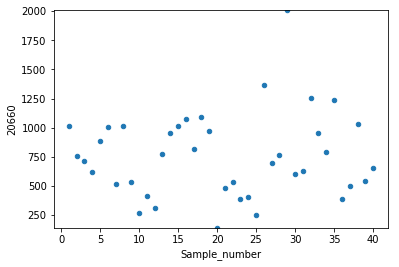

In [27]:
"""
ELF1 
""" 
df = GE_data_[GE_data_.Name==elf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name,ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

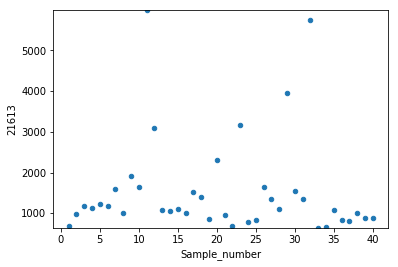

In [28]:
"""
IRF1 
""" 
df = GE_data_[GE_data_.Name==irf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

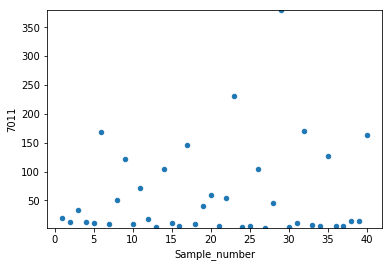

In [29]:
"""
SYNGR1
""" 
df = GE_data_[GE_data_.Name==syngr1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

In [30]:
# """
# UNC5A
# """ 
# df = GE_data_[GE_data_.Name==unc5a].T.drop(['Name'])
# column_name = df.columns.values[0]
# df[column_name] = df[column_name].astype(float)
# df['Sample_number'] = range(1, len(df) + 1)
# df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

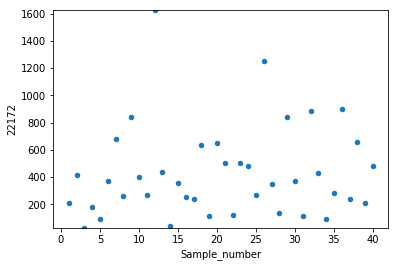

In [31]:
"""
MT1F
""" 
df = GE_data_[GE_data_.Name==mt1f].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

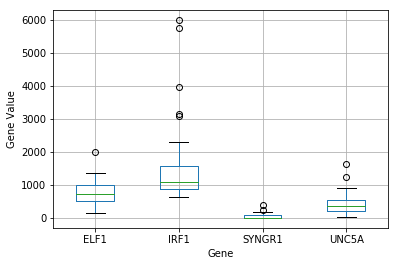

In [32]:
""" 
Box plot 
"""

df = GE_data_[GE_data_.Name.isin(gene_id_list)]
df = df.T.drop(['Name']) 
df = df.astype(float) 
df.boxplot(column=column_name_list).set_xticklabels(['ELF1', 'IRF1', 'SYNGR1','UNC5A','MT1F']) 
plt.xlabel("Gene")
plt.ylabel("Gene Value")

In [33]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
GE_data_['CV'] = GE_data_.apply(lambda row : cv(row.T.drop(['Name'])), axis = 1)  
GE_data_['Gene_number'] = range(1, len(GE_data_) + 1) 

(0, 0.1)

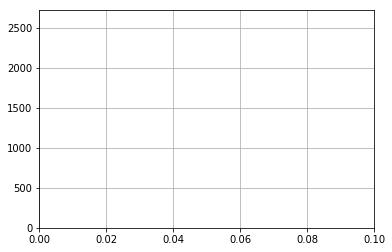

In [34]:
GE_data_['CV'].hist(bins=100).set_xlim(0,0.1)

In [35]:
for gene_ref_id in gene_id_list:
    print(GE_data_[GE_data_['Name']==gene_ref_id]['CV'] )

20660    0.476365
Name: CV, dtype: float64
21613    0.79282
Name: CV, dtype: float64
7011    1.395253
Name: CV, dtype: float64
22172    0.778631
Name: CV, dtype: float64


In [36]:
sorted_raw_expre = GE_data_.sort_values(by='CV', ascending=False).reset_index()

In [37]:
for gene_ref_id in gene_id_list:
    print("gene_ref_id",gene_ref_id)
    print(sorted_raw_expre[sorted_raw_expre['Name']==gene_ref_id].index)

gene_ref_id 212418_at
Int64Index([14430], dtype='int64')
gene_ref_id 202531_at
Int64Index([5733], dtype='int64')
gene_ref_id 210613_s_at
Int64Index([1078], dtype='int64')
gene_ref_id 217165_x_at
Int64Index([5991], dtype='int64')
